My ID - A09190061, last two digits - 61

In [64]:
# Standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Rest of required libraries

from sklearn.metrics import classification_report, plot_roc_curve, confusion_matrix, auc 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, mean_squared_error, r2_score
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_digits, make_friedman1
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, auc, classification_report, precision_recall_curve

# Problem1: Classification

In [18]:
# Loading the dataset
df1 = load_digits()
X = pd.DataFrame(df1["data"])
y = df1["target"]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

In [19]:
# Creating the pipeline
scaler = MinMaxScaler()
# Pipeline for AdaBoost
combined_model_adaboost = make_pipeline(scaler, AdaBoostClassifier())

#### The computation power of my laptop is too low, so I used HalvingGridSearchCV instead of regular GridSearchCV.

In [20]:
# Hyperparameter tuning for Adaboost
n_estimators_grid = np.arange(50, 400, 50)
learning_rate_grid = np.linspace(0.00001, 3, 20)
optimal_model_adaboost = HalvingGridSearchCV(combined_model_adaboost, param_grid={"adaboostclassifier__n_estimators": n_estimators_grid, "adaboostclassifier__learning_rate": learning_rate_grid}, cv = 5, scoring='f1_macro', n_jobs=-1)
optimal_model_adaboost.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                              ('adaboostclassifier',
                                               AdaBoostClassifier())]),
                    n_jobs=-1,
                    param_grid={'adaboostclassifier__learning_rate': array([1.00000000e-05, 1.57904211e-01, 3.15798421e-01, 4.73692632e-01,
       6.31586842e-01, 7.89481053e-01, 9.47375263e-01, 1.10526947e+00,
       1.26316368e+00, 1.42105789e+00, 1.57895211e+00, 1.73684632e+00,
       1.89474053e+00, 2.05263474e+00, 2.21052895e+00, 2.36842316e+00,
       2.52631737e+00, 2.68421158e+00, 2.84210579e+00, 3.00000000e+00]),
                                'adaboostclassifier__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350])},
                    refit=<function _refit_callable at 0x000001CFCFC31040>,
                    scoring='f1_macro')

In [21]:
# Obtain the optimal model's best parameters and score
best_params = optimal_model_adaboost.best_params_
best_score = optimal_model_adaboost.best_score_
print(f"Best parameters: {best_params}")
print(f"Best F1 score: {best_score}")

Best parameters: {'adaboostclassifier__learning_rate': 2.368423157894737, 'adaboostclassifier__n_estimators': 350}
Best F1 score: 0.8783942748458424


#### After the GridSearch we see that the optimal model chose learning rate = 2.368, and nestimators = 350, and the Best F1 score is 0.878(not to depend only on precision or recall)

In [22]:
pred_prob_adaboost = optimal_model_adaboost.best_estimator_.predict_proba(X_test)
precision_adaboost, recall_adaboost, thresholds_adaboost = precision_recall_curve(y_true = y_test, probas_pred = pred_prob_adaboost[:,1], pos_label = 1)

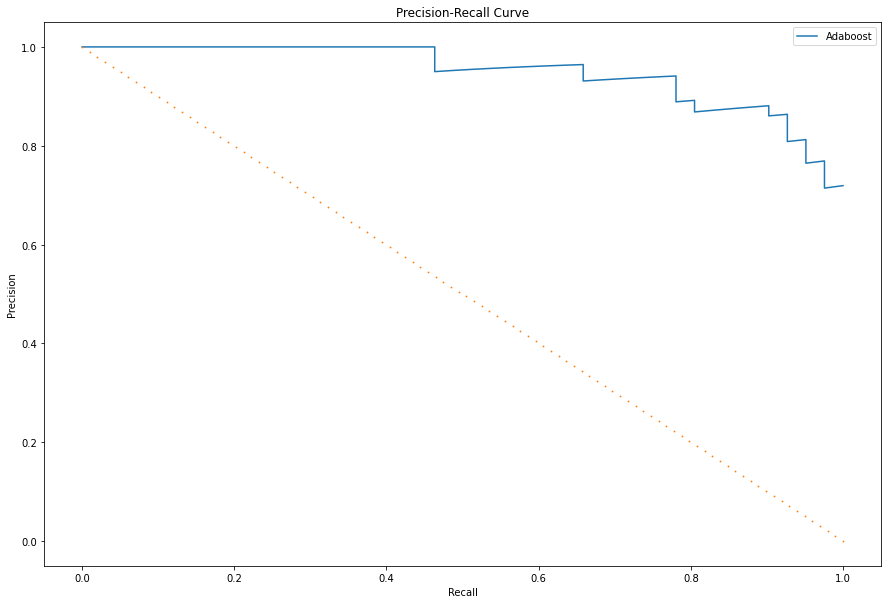

In [23]:
# Plotting preciison-recall curves

x = np.linspace(0,1,100)
plt.figure(figsize = (15,10)) 
plt.plot(recall_adaboost, precision_adaboost, label="Adaboost") 
plt.plot(x,-x+1,".", markersize = 1.6) 
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [24]:
print(f"AUC of Adaboost: {auc(recall_adaboost, precision_adaboost)}")

AUC of Adaboost: 0.94857267087113


In [46]:
y_pred = optimal_model_adaboost.predict(X_test)
report = classification_report(y_test, y_pred)
print("AdaBoost Classifier - Classification Report")
print(report)

AdaBoost Classifier - Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.97      0.80      0.88        41
           2       0.96      0.76      0.85        34
           3       0.91      0.69      0.78        29
           4       0.92      0.89      0.90        37
           5       0.86      0.94      0.90        33
           6       0.97      0.97      0.97        36
           7       0.92      0.94      0.93        35
           8       0.69      0.95      0.80        39
           9       0.81      0.92      0.86        38

    accuracy                           0.89       360
   macro avg       0.90      0.88      0.89       360
weighted avg       0.90      0.89      0.89       360



#### We see that for test data the classification report shows that the Accuracy is 0.89

In [25]:
# Train score
train_score = optimal_model_adaboost.score(X_train, y_train)
print(f"Train score: {train_score}")

# CV score (best_score_ attribute already contains this value)
cv_score = best_score
print(f"CV score: {cv_score}")

# Test score
test_score = optimal_model_adaboost.score(X_test, y_test)
print(f"Test score: {test_score}")

Train score: 0.906666959169564
CV score: 0.8783942748458424
Test score: 0.8854102171141724


#### Discussion1: I initially claim that if my model's train score is greater than 0.85 then I will say there is no problem of overfitting. In this case the train score is equal to 0.9098 which is greater than my threshhold of underfitting then I claim that here this model has no issue with underfitting. Now let's move on and compare Train and CV scores. 0.9066 and 0.878 are not significantly far from each other, because I claim that if their difference less than 0.05 then the difference is not significant. As the Traina and CV scores are close to each other we can claim that there is no issue of overfitting. Now let's compare Test and CV scores.  0.885 and 0.878 are very very close to each other (less than the threshhold 0.05), so we can claim that the CV and Test sets are coming from the same distribution, so we are confident that the we have well tuned values for our hyperparams. Ultimatelly based on the abovementioned facts I claim that this model(Adaboost classifier) is acceptable.

## Now Let's look to Gradient Boosting Classifier

In [40]:
# Create the pipeline for GradientBoostingClassifier
combined_model_gradientboosting = make_pipeline(scaler, GradientBoostingClassifier())

param_grid = {
    'gradientboostingclassifier__n_estimators': [50, 100, 150, 200, 250, 300, 350],
    'gradientboostingclassifier__learning_rate': [0.001, 0.01, 0.1, 1, 2]
}

# Now let's perform the grid search to find the best hyperparameters
optimal_model_gradboost = HalvingGridSearchCV(combined_model_gradientboosting, param_grid=param_grid, cv=3, n_jobs=-1)
optimal_model_gradboost.fit(X_train, y_train)

HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                              ('gradientboostingclassifier',
                                               GradientBoostingClassifier())]),
                    n_jobs=-1,
                    param_grid={'gradientboostingclassifier__learning_rate': [0.001,
                                                                              0.01,
                                                                              0.1,
                                                                              1,
                                                                              2],
                                'gradientboostingclassifier__n_estimators': [50,
                                                                             100,
                                                                             150,
                                              

In [41]:
# Obtain the optimal model's best parameters and score
best_params = optimal_model_gradboost.best_params_
best_score = optimal_model_gradboost.best_score_
print(f"Best parameters: {best_params}")
print(f"Best F1 score: {best_score}")

Best parameters: {'gradientboostingclassifier__learning_rate': 1, 'gradientboostingclassifier__n_estimators': 200}
Best F1 score: 0.9259259259259259


#### We see that the learning rate is equal to 1, nestimators is 200, and f1 score is 0.925

In [42]:
pred_prob_gradboost = optimal_model_gradboost.best_estimator_.predict_proba(X_test)
precision_gradboost, recall_gradboost, thresholds_gradboost = precision_recall_curve(y_true = y_test, probas_pred = pred_prob_gradboost[:,1], pos_label = 1)

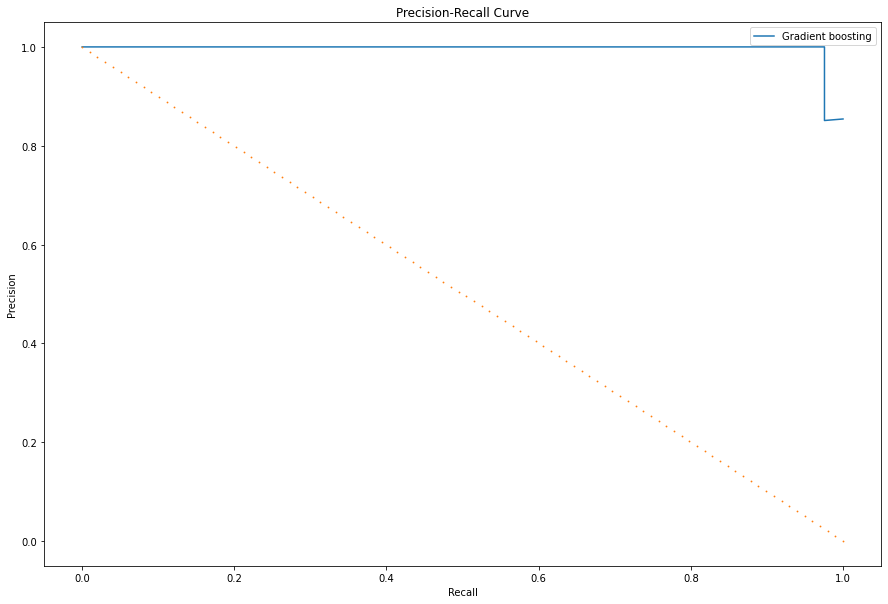

In [43]:
# Plotting preciison-recall curves

x = np.linspace(0,1,100)
plt.figure(figsize = (15,10)) 
plt.plot(recall_gradboost, precision_gradboost, label="Gradient boosting") 
plt.plot(x,-x+1,".", markersize = 1.6) 
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [44]:
print(f"AUC of Gradient boosting classification: {auc(recall_gradboost, precision_gradboost)}")

AUC of Gradient boosting classification: 0.9964052499567548


In [48]:
y_pred = optimal_model_gradboost.predict(X_test)
report = classification_report(y_test, y_pred)
print("AdaBoost Classifier - Classification Report")
print(report)

AdaBoost Classifier - Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       1.00      0.98      0.99        41
           2       1.00      0.94      0.97        34
           3       0.96      0.90      0.93        29
           4       0.95      0.95      0.95        37
           5       0.97      1.00      0.99        33
           6       0.95      0.97      0.96        36
           7       0.92      0.97      0.94        35
           8       0.93      0.95      0.94        39
           9       0.92      0.92      0.92        38

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [ ]:
#### We see that for test data the classification report shows that the Accuracy is 0.95

In [45]:
# Train score
train_score = optimal_model_gradboost.score(X_train, y_train)
print(f"Train score: {train_score}")

# CV score (best_score_ attribute already contains this value)
cv_score = best_score
print(f"CV score: {cv_score}")

# Test score
test_score = optimal_model_gradboost.score(X_test, y_test)
print(f"Test score: {test_score}")

Train score: 0.9986082115518441
CV score: 0.9259259259259259
Test score: 0.9527777777777777


#### Discussion2: I initially claim that if my model's train score is greater than 0.85 then I will say there is no problem of overfitting. In this case the train score is equal to 0.9986 which is greater than my threshhold of underfitting then I claim that here this model has no issue with underfitting. Now let's move on and compare Train and CV scores. 0.9986 and 0.9259 are significantly far from each other, because I claim that if their difference less than 0.05 then the difference is significant and there is a possible issue of overfitting. As the Train and CV scores are significantly different from each other we can claim that there is an issue of overfitting. Now let's compare Test and CV scores.  0.95277 and 0.9259 are close to each other (less than the threshhold 0.05), so we can claim that the CV and Test sets are coming from the same distribution, so we are confident that the we have well tuned values for our hyperparams. Ultimatelly based on the abovementioned facts I claim that this model is not good enough because there is a possible issue of overfitting according to my threshold, so further works(for example regularization, collect more data ) to overcome this issue. So I do not accept this model.

#### Based on my two discussion about model1(Adaboostclassifeir) and model2(gradientboostclassifier) I prefer the model1, because it performs better(has no issue with underfit, overfitting and we are confident that parameters are tuned well), but in case of model2 there is some issue with overfitting that makes me afraid to choose that model. So Model1(Adaboostclassifier) is the winner!!!

# Problem 2

## My ID - A09190061, last two digits - 61

In [50]:
# Reading the data
data = make_friedman1(n_samples=2000, n_features=10, noise=1, random_state=61)
columns = ['Feature ' + str(i) for i in range(1, 11)]
X = pd.DataFrame(data[0])
X.columns = columns
y = data[1]

# Splitting to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

In [51]:
# Labeled features
X

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10
0,0.824469,0.181350,0.877327,0.499551,0.964926,0.003546,0.923644,0.629444,0.304298,0.340925
1,0.140735,0.487002,0.881047,0.452995,0.474998,0.882341,0.667464,0.081829,0.027823,0.720033
2,0.711822,0.039873,0.466009,0.367395,0.599223,0.724687,0.191987,0.528219,0.291443,0.139491
3,0.955981,0.605044,0.910282,0.457832,0.043483,0.126563,0.334569,0.447856,0.425973,0.548966
4,0.769691,0.922199,0.749690,0.292347,0.193074,0.260583,0.726084,0.454452,0.171107,0.642443
...,...,...,...,...,...,...,...,...,...,...
1995,0.800617,0.075045,0.409141,0.398778,0.563133,0.963809,0.322028,0.954875,0.095632,0.368797
1996,0.258222,0.314044,0.262170,0.036709,0.194434,0.902738,0.937243,0.400341,0.067509,0.024034
1997,0.831863,0.905300,0.939497,0.356512,0.369527,0.788484,0.260343,0.467541,0.586687,0.427316
1998,0.536900,0.476609,0.290489,0.555933,0.955677,0.368670,0.285442,0.072169,0.840359,0.506708


In [52]:
# min-max scaler for the pipeline
scaler = MinMaxScaler()

# Pipeline for Gradient boosting
model_gb = make_pipeline(scaler, GradientBoostingRegressor())

In [58]:
# Hyperparameter tuning for greadient boosting
n_estimators_grid = np.arange(50, 350, 50)
min_samples_split_grid = np.arange(2, 4)
learning_rate_grid = [0.001, 0.01, 0.1, 1, 2]

optimal_model_gb = HalvingGridSearchCV(model_gb, 
    param_grid={
        "gradientboostingregressor__n_estimators": n_estimators_grid, 
        "gradientboostingregressor__min_samples_split": min_samples_split_grid, 
        "gradientboostingregressor__learning_rate": learning_rate_grid
    }, cv = 3,  n_jobs=-1)
optimal_model_gb.fit(X_train, y_train)

HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                              ('gradientboostingregressor',
                                               GradientBoostingRegressor())]),
                    n_jobs=-1,
                    param_grid={'gradientboostingregressor__learning_rate': [0.001,
                                                                             0.01,
                                                                             0.1,
                                                                             1,
                                                                             2],
                                'gradientboostingregressor__min_samples_split': array([2, 3]),
                                'gradientboostingregressor__n_estimators': array([ 50, 100, 150, 200, 250, 300])},
                    refit=<function _refit_callable at 0x000001CFCFC31040>)

In [59]:
# Obtain the optimal model's best parameters and score
best_params = optimal_model_gb.best_params_
best_score = optimal_model_gb.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score (R2): {best_score}")


Best parameters: {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 300}
Best score (R2): 0.9086344279980335


In [ ]:
### So we found out that the optimal learning rate is 0.1, min_samples_split is 2, nestimators is 300.

In [61]:
# Find the 5 most important features
gb_clf = optimal_model_gb.best_estimator_.named_steps['gradientboostingregressor']
importances = gb_clf.feature_importances_
indices = np.argsort(importances)[-5:]

print("Top 5 important features:")
for i in indices[::-1]:
    print(f"{X.columns[i]} - Importance: {importances[i]}")


Top 5 important features:
Feature 4 - Importance: 0.32132915622927644
Feature 1 - Importance: 0.23835610754448985
Feature 2 - Importance: 0.23749743273388346
Feature 3 - Importance: 0.10215900253355434
Feature 5 - Importance: 0.08712713666186808


#### Top 5 important features:
#### Feature 4 - Importance: 0.32132915622927644
#### Feature 1 - Importance: 0.23835610754448985
#### Feature 2 - Importance: 0.23749743273388346
#### Feature 3 - Importance: 0.10215900253355434
#### Feature 5 - Importance: 0.08712713666186808        

#### Feature 4 has the highest importance.

In [71]:
# Calculate R-squared scores for training and test sets
train_score = optimal_model_gb.score(X_train, y_train)
test_score = optimal_model_gb.score(X_test, y_test)

# Print the R-squared scores
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"CV score: {best_score}")

Train score: 0.977539757680062
Test score: 0.9247100255860646
CV score: 0.9086344279980335


#### Modelevaluation1: I initially claim that if my model's train score is greater than 0.85 then I will say there is no problem of overfitting. In this case the train score is equal to 0.9775 which is greater than my threshhold of underfitting then I claim that here this model has no issue with underfitting. Now let's move on and compare Train and CV scores. 0.977 and 0.908 are significantly far from each other, because I claim that if their difference less than 0.05 then the difference is significant, so eventually there is overfitting issue. As the Train and CV scores are not close to each other we can claim that there is an issue of overfitting. Now let's compare Test and CV scores.  0.924 and 0.908 are very close to each other (less than the threshhold 0.05), so we can claim that the CV and Test sets are coming from the same distribution, so we are confident that the we have well tuned values for our hyperparams. Ultimatelly based on the abovementioned facts I claim that this model is not acceptable, because of the issue of overfitting.

## Model2

In [72]:
# Add PolynomialFeatures to the pipeline
model_gb_poly = make_pipeline(scaler, PolynomialFeatures(), GradientBoostingRegressor())

# Hyperparameter tuning for Gradient Boosting Regressor with PolynomialFeatures
optimal_model_gb_poly = HalvingGridSearchCV(
    model_gb_poly, 
    param_grid={
        "polynomialfeatures__degree": [2, 3],
        "gradientboostingregressor__n_estimators": n_estimators_grid,
        "gradientboostingregressor__min_samples_split": min_samples_split_grid,
        "gradientboostingregressor__learning_rate": learning_rate_grid
    }, 
    cv=3,
    n_jobs=-1
)

optimal_model_gb_poly.fit(X_train, y_train)

HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                              ('polynomialfeatures',
                                               PolynomialFeatures()),
                                              ('gradientboostingregressor',
                                               GradientBoostingRegressor())]),
                    n_jobs=-1,
                    param_grid={'gradientboostingregressor__learning_rate': [0.001,
                                                                             0.01,
                                                                             0.1,
                                                                             1,
                                                                             2],
                                'gradientboostingregressor__min_samples_split': array([2, 3]),
                                'gradientboostingregressor__n_es

In [66]:
best_params_poly = optimal_model_gb_poly.best_params_
best_score_poly = optimal_model_gb_poly.best_score_
print(f"Best parameters: {best_params_poly}")
print(f"Best score (R2): {best_score_poly}")

Best parameters: {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 150, 'polynomialfeatures__degree': 3}
Best score (R2): 0.9226695980572658


In [77]:
poly_feature_names = optimal_model_gb_poly.best_estimator_.steps[1][1].get_feature_names(X.columns)

# Get feature importances
importances = optimal_model_gb_poly.best_estimator_.named_steps['gradientboostingregressor'].feature_importances_

# Create a dataframe with feature names and their importances
feature_importances = pd.DataFrame({'Feature': poly_feature_names, 'Importance': importances})

# Sort the features by their importance in descending order
top_5_features = feature_importances.sort_values(by='Importance', ascending=False).head()

# Print the top 5 features and their importances
print(top_5_features)

                Feature  Importance
12  Feature 1 Feature 2    0.327015
39  Feature 4 Feature 5    0.159019
14  Feature 1 Feature 4    0.139231
4             Feature 4    0.072732
23  Feature 2 Feature 4    0.068726


#### Here are they, the first is the artadryal of feature1 and feature2, the second one is the artadryal of Feature 4 and Feature 5, then the artadryal of Feature 1 and Feature 4, then only feature4, and finally the artadryal of Feature 2 and Feature 4

In [70]:
# Calculate R-squared scores for training and test sets
train_score = optimal_model_gb_poly.score(X_train, y_train)
test_score = optimal_model_gb_poly.score(X_test, y_test)

# Print the R-squared scores
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"CV score: {best_score}")

Train score: 0.976602087337717
Test score: 0.938211263912042
CV score: 0.9086344279980335


#### Modelevaluation2: I initially claim that if my model's train score is greater than 0.85 then I will say there is no problem of overfitting. In this case the train score is equal to 0.976 which is greater than my threshhold of underfitting then I claim that here this model has no issue with underfitting. Now let's move on and compare Train and CV scores. 0.976 and 0.9086 are significantly far from each other, because I claim that if their difference less than 0.05 then the difference is significant, so eventually there is overfitting issue. As the Train and CV scores are not close to each other we can claim that there is an issue of overfitting. Now let's compare Test and CV scores.  0.938 and 0.908 are very close to each other (less than the threshhold 0.05), so we can claim that the CV and Test sets are coming from the same distribution, so we are confident that the we have well tuned values for our hyperparams. Ultimatelly based on the abovementioned facts I claim that this model is not acceptable, because of the issue of overfitting.

#### Overall both models are may have issue of overfitting, and further work should be done to improve them, if one asked which one should I chose, I would say none because both have the same issue. We should make further improvements and then again compare them. But after all second model's test score is slightly higher, which may seem that it is better.